## Loading and Cleaning Data

- Imports .csv file

In [2]:
import pandas as pd

df = pd.read_csv('Spotify Tracks Dataset.csv')

- This dataset has an issue where many version of the same song appear, but have different popularity scores because they appear in different playlists. This code fixes that by keeping only the version of each song with the highest popularity.
- Groups by composite primary keys (assuming track name and artists can uniquely identify each song) and finds the index of the largest popularity for each, then sets the dataframe equal to the rows at just those indices. 
- There is a chance that this may omit some records (e.g., if there are two differents songs with the same title and artists), but with the large size of our dataset, we can prioritize removing unnecessary data as much as possible.

In [3]:
unique_cols = ['track_name', 'artists']
indices = df.groupby(unique_cols)['popularity'].idxmax()
df = df.loc[indices]

- Sorts by popularity, lowest to highest

In [4]:
df = df.sort_values(by='popularity')

In [20]:

# Keeps the rows where the artist has at least one song above 60 pop. and at least one below 20
selected_artists = df.groupby('artists').filter(lambda group: ((group['popularity'] > 45).any()) & ((group['popularity'] < 20).any())).copy()['artists']





In [28]:
selected_artists = df.groupby('artists').filter(lambda group: not ((group['popularity'] > 40).any())).copy()['artists']
selected_artists

93789                              Sergei Lemeshev
68748                     Alex Sensation;Nicky Jam
101123    Traditional;Royal Philharmonic Orchestra
25329                                         Zapp
78734                                   Chaos Team
                            ...                   
95058                           Josimar y Su Yambú
40653      Paulo Nazareth;Marcos Almeida;Os Arrais
33440                                Protiva;Refew
110904                                  Hi Profile
89983                               Alberto Stylee
Name: artists, Length: 32927, dtype: object

In [ ]:
selected_artists2 = df.groupby('artists').filter(lambda group: not ((group['popularity'] > 40).any()) & (group['popularity'])).copy()['artists']

In [29]:
df[df['artists'].isin(selected_artists)]['popularity'].median()

22.0

In [22]:
len(selected_artists)

10319

In [23]:


# Removes any row where that artist is in the selected artists (above) and then popularity is less than 20
bool_mask = ~((df['artists'].isin(selected_artists)) & (df['popularity'] < 20))
correct_df = df[bool_mask]

correct_df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
93789,93789,46LAxxMVTZ4dHpTUWr88yQ,Sergei Lemeshev,Russian Vocal School. Sergey Lemeshev (CD2),"Eh You, Van'ka",0,202000,False,0.265,0.261,...,-15.024,0,0.0452,0.97000,0.018600,0.0947,0.204,87.589,5,romance
68748,68748,3ihD3lOeQRlzTwaORNulux,Alex Sensation;Nicky Jam,Para entrar en calor,La Diabla,0,202693,False,0.848,0.825,...,-4.177,0,0.0899,0.39700,0.000000,0.0498,0.803,102.047,4,latino
101123,101123,3yDLFnWl3HvnkJmhlSpoaw,Traditional;Royal Philharmonic Orchestra,"Classical Christmas, Vol. 1",The Twelve Days of Christmas (Remastered 2014),0,261635,False,0.433,0.470,...,-11.853,1,0.0704,0.94500,0.000002,0.4690,0.319,71.184,4,sleep
25329,25329,1zo8QWu2Sox7EataHgBpDS,Zapp,80's,More Bounce to the Ounce,0,311120,False,0.850,0.818,...,-8.624,1,0.0905,0.12400,0.001250,0.3490,0.840,105.268,4,disco
78734,78734,4CXMnBWb6SAQtcbXN3xhbo,Chaos Team,Ballermann Party Hits Megamix 2022.2,Ein Leben für die Party,0,175190,False,0.656,0.913,...,-3.830,1,0.0501,0.14800,0.000000,0.3360,0.697,142.017,4,party
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67358,67358,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,...,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latin
20008,20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
67356,67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20148,20148,2bpZXHIBksZowrsrEExapt,Sam Smith,Autumn Vibes 2022,Like I Can,0,166346,False,0.628,0.683,...,-5.565,0,0.0467,0.24600,0.000000,0.1760,0.462,99.800,4,dance
93789,93789,46LAxxMVTZ4dHpTUWr88yQ,Sergei Lemeshev,Russian Vocal School. Sergey Lemeshev (CD2),"Eh You, Van'ka",0,202000,False,0.265,0.261,...,-15.024,0,0.0452,0.97000,0.018600,0.0947,0.204,87.589,5,romance
68748,68748,3ihD3lOeQRlzTwaORNulux,Alex Sensation;Nicky Jam,Para entrar en calor,La Diabla,0,202693,False,0.848,0.825,...,-4.177,0,0.0899,0.39700,0.000000,0.0498,0.803,102.047,4,latino
101123,101123,3yDLFnWl3HvnkJmhlSpoaw,Traditional;Royal Philharmonic Orchestra,"Classical Christmas, Vol. 1",The Twelve Days of Christmas (Remastered 2014),0,261635,False,0.433,0.470,...,-11.853,1,0.0704,0.94500,0.000002,0.4690,0.319,71.184,4,sleep
30282,30282,3GqdU7BqLVpP7hBtlncv3n,Swedish House Mafia,Larga Vida al Electro,One - Radio Edit,0,169920,False,0.802,0.780,...,-6.564,1,0.0367,0.00750,0.824000,0.1470,0.623,125.027,4,edm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67358,67358,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,...,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latin
20008,20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
67356,67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop


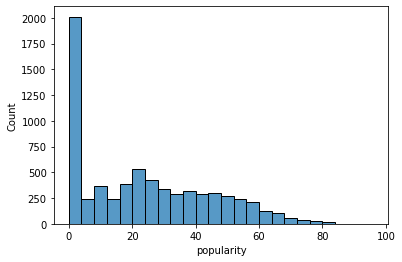

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20148,20148,2bpZXHIBksZowrsrEExapt,Sam Smith,Autumn Vibes 2022,Like I Can,0,166346,False,0.628,0.683,...,-5.565,0,0.0467,0.246000,0.000000,0.1760,0.462,99.800,4,dance
101123,101123,3yDLFnWl3HvnkJmhlSpoaw,Traditional;Royal Philharmonic Orchestra,"Classical Christmas, Vol. 1",The Twelve Days of Christmas (Remastered 2014),0,261635,False,0.433,0.470,...,-11.853,1,0.0704,0.945000,0.000002,0.4690,0.319,71.184,4,sleep
78734,78734,4CXMnBWb6SAQtcbXN3xhbo,Chaos Team,Ballermann Party Hits Megamix 2022.2,Ein Leben für die Party,0,175190,False,0.656,0.913,...,-3.830,1,0.0501,0.148000,0.000000,0.3360,0.697,142.017,4,party
78052,78052,3YEPUR731DgSBj3QBNsGEc,Bierkapitän,Ballermann Party Hits Megamix 2022.2,Ein Pils steht im Wald (Die Tannen zapfen),0,191102,False,0.657,0.989,...,-1.919,1,0.1640,0.125000,0.000000,0.3120,0.353,130.015,4,party
25547,25547,7yYm7J1kvfMcn9GRwnBjmx,Nockis,Beste Weihnachtslieder,"Ein Weihnachtslied, das dir gehört",0,199413,False,0.556,0.649,...,-6.660,1,0.0254,0.538000,0.000009,0.2580,0.577,107.030,4,disco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18710,18710,21LDwmMNxkKRHgilOFKl9H,Chingo Bling,Chicken Flippa (Mixtape),Aye Wey Wey,24,98760,True,0.705,0.699,...,-4.958,1,0.3530,0.300000,0.000000,0.5720,0.716,77.808,1,comedy
107899,107899,252fosbGeg1SBgCxVQm5JP,Eurythmics;Annie Lennox;Dave Stewart,Ultimate Collection,Right By Your Side - Remastered Version,24,228946,False,0.576,0.774,...,-8.003,1,0.0440,0.037800,0.000010,0.2530,0.896,168.765,4,synth-pop
61336,61336,3qVLCK6wH839yFlfDv4x0q,Flower,THIS IS Flower THIS IS BEST,SAKURAリグレット(version2016),24,310600,False,0.671,0.890,...,-3.711,0,0.0417,0.143000,0.000000,0.1070,0.579,115.002,4,j-idol
107721,107721,61HGzMjSgcnQSBHc3Fehcn,Berlin,80s New Wave Hits,Metro (Re-Recorded),24,260786,False,0.471,0.893,...,-10.166,0,0.0329,0.000565,0.000550,0.0763,0.914,169.185,4,synth-pop


In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

keywords = ['top', 'best', 'christmas', 'playlist', 'halloween', 
            'autumn', 'vibe', 'thanksgiving', 'party', 'collection', 
            'finest', 'tunes', 'cafe', 'mood', 'mix', '50s', '60s', '70s', '80s', '90s',
            '2000', 'mixtape', 'remix', 'pov', 'rainy', 'upbeat', 'pop', 'trending', 'blend',
            'refreshing', 'indie', 'aesthetic', 'mega', 'classic']


regex_pattern = '|'.join(keywords)
temp_df = df[df['album_name'].str.contains(regex_pattern, case=False, na=False)]


sns.histplot(data=temp_df, x='popularity')
plt.show()
temp_df[temp_df['popularity'] < 25]



74512


C:\Users\rjc52\AppData\Local\Temp\ipykernel_8332\3620704266.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=df2[df['popularity'] > 29], x='popularity')


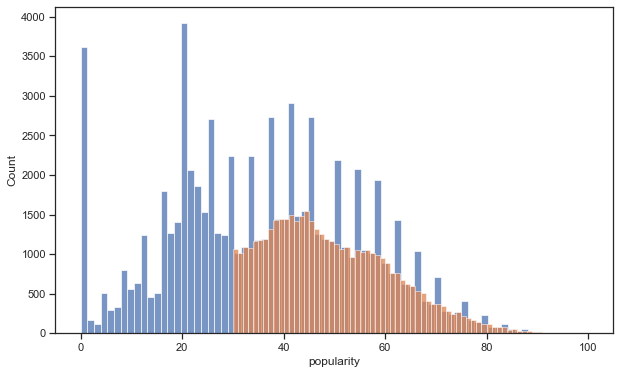

In [247]:
df2 = df[~((df['album_name'].str.contains(regex_pattern, case=False, na=False)))]
print(len(df2))

plt.figure(figsize=(10,6))
sns.set_style('ticks')
sns.histplot(data=df2, x='popularity')
sns.histplot(data=df2[df['popularity'] > 29], x='popularity')
plt.show()

- Exports to .csv file

In [ ]:
df.to_csv('updated_dataset.csv', index=False)

In [129]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
